### 1. Описание проекта: 
В нашем распоряжении данные интернет-магазина 'Стримчик', который продаёт игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
### 1.1. Цель исследования: 
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
### 1.2. Ход исследования: 
Откроем файл с данными и изучим общую информаци. Путь к файлу, с которым я буду работать:  /datasets/games.csv. Далее подготовим данные, т.е. обработаем столбцы, преобразуем тип данных, при необходимости обработаем пропуски и посчитаем суммарные продажи во всех регионах и запишем их в отдельные столбцы. После проведем исследовательский аналлиз данных, нас интересует: сколько игр выпускалось в разные годы, как менялись продажи платформы, какие платформы лидируют по продажам, соотношение выводов с продажи игр на других платформах, общее распределение игр по жанрам; Составим проект пользователей каждого региона. Далее проверим возможные гипотезы, к примеру: средние пользовательские рейтинги платформ Xbox One и PC одинаковые, средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. После сделать общий вывод по всей работе.

### Таким образом, работа будет поделена на несколько частей: 
1. Обзор данных.
2. Подготовка данных.
3. Проведение исследовательского анализа данных.
4. Составление проект пользователей каждого региона.
5. Прроверка гипотез 
6. Написание общего вывода 


### Описание данных: 
Name — название игры
<br>Platform — платформа
<br>Year_of_Release — год выпуска
<br>Genre — жанр игры
<br>NA_sales — продажи в Северной Америке (миллионы проданных копий)
<br>EU_sales — продажи в Европе (миллионы проданных копий)
<br>JP_sales — продажи в Японии (миллионы проданных копий)
<br>Other_sales — продажи в других странах (миллионы проданных копий)
<br>Critic_Score — оценка критиков (максимум 100)
<br>User_Score — оценка пользователей (максимум 10)
<br>Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
<br>Данные за 2016 год могут быть неполными.

### 1 шаг: Обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('C:\\Users\\37544\\Downloads\\games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### 2 шаг: Подготовка данных

In [4]:
data.columns = data.columns.str.lower()
data.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


In [5]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
data[data['critic_score'].isnull()].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Как мы видим, в большинстве случаев пропуски находятся одновременно и в оценке критиков, и в оценки пользователей, и в рейтинге. Это может говорить, что игра не пользовалась особой популярностью и не стоила того, чтоб игровые журналисты или пользвователи её как-то оценивали. В остальных же случаях, где пропусков немного, они могли быть допущены по невнимательности.

In [7]:
data.duplicated().sum()

0

Пропусков достаточно много, но дубликатов нету.

In [8]:
# Удалим записи, где кол-во пропусков несуществено относительно кол-во данных в этом столбце/
data.dropna(subset=['name'], inplace=True)
data.dropna(subset=['year_of_release'], inplace=True)
data.dropna(subset=['genre'], inplace=True)

Проверим уникальные значения и заменим пропуски в столбцах, где их много. (Critic_Score, User_Score, Rating)

In [9]:
# 1. user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
# Изменин 'tbd' на Nan, поскольку в практическом плане они значат для нас одно и тоже.
data.loc[data['user_score'] == 'tbd', 'user_score']=np.nan
# Далее заменим пропуски в user_score на заглушку -10
data['user_score'] = data['user_score'].fillna(-10)

In [11]:
# 2. critic_score
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [12]:
# Заменим пропуски в critic_score на заглушку -10
data['critic_score'] = data['critic_score'].fillna(-10)

In [13]:
# 3. rating
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [14]:
# У нас нету возможности заменить пропущенные значения медианным, поэтому просто заменим их на Unknow
data['rating'] = data['rating'].fillna('Unknow')

In [15]:
data.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Как мы видим, пропусков больше нету. <br>
<br>Далее займёмся типом данных:

In [16]:
# Изменим тип данных в year_of_release и user_score
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [17]:
# Добавим новый столбец sum_sales , который содержит суммарные продажы по всем регионам
data['sum_sales'] =  data.loc[:, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

Вывод: в процессе предобработки данных мы удалили пропуски в тех местах, где их было меньше 5% от всего столбца, в остальных случаях пропуски заполнили значение заглушки в -10 и изменили тип данных в year_of_release с float на int и в user_score на float. Создали столбец "sum_sales", который включает суммарные продажи по всем регионам. В целом, данные предобработаны и готовы к дальнейшему изучению.

### 3 шаг: Исследовательский анализ данных
Нас интересует: <br>1) Сколько игр выпускалось в разные годы, выжны ли данные за весь период; <br>2) Как менялись продажи платформы и какие платформы лидируют по продажам; <br>3) Возьмём данные за соответствующий актуальный период.  <br>4) Соотношение выводов с продажи игр на других платформах; <br>5) "Ящик с усами" по глобальным продажам игр в разбивке по платформам; <br>6) Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков; <br>7) Диаграмму рассеяния и корреляция между отзывами и продажами;  <br>8) Общее распределение игр по жанрам; Составим проект пользователей каждого региона.

Text(0, 0.5, 'Кол-во выпускаемых игр')

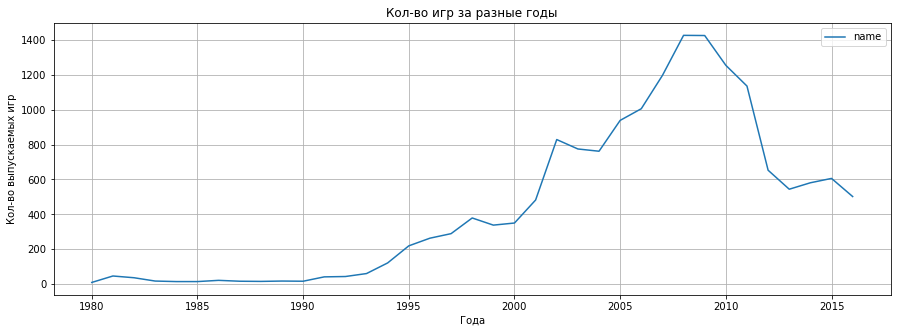

In [18]:
# 1. Кол-во игр за разные годы:
data.pivot_table(index=['year_of_release'], values=['name'], aggfunc='count').plot(grid=True, figsize=(15, 5))
plt.title('Кол-во игр за разные годы')
plt.xlabel('Года')
plt.ylabel('Кол-во выпускаемых игр')

Вывод:
<br> С 1995 года количество игр начала постепенно расти, с 2000 по 2002 образовался резкий скачок, но после, вплоть до 2004 года, образовался небольшой застой. В 2005 кол-во выпускаемых игр опять стало резко расти и только к 2009 и до 2016 года наблюдается упадок. 
<br> По графику видно, что данные за все годы являются актыальными и отражают как взлёты, так и падения.

Text(0, 0.5, 'Кол-во продаж')

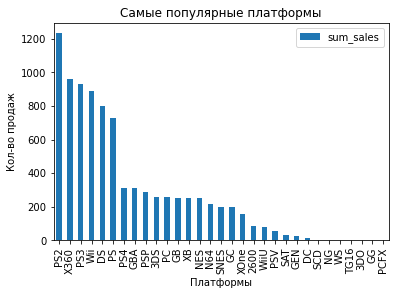

In [19]:
# 2. Какие платформы лидируют по продажам: 
data.pivot_table(index=['platform'], values=['sum_sales'], aggfunc='sum').sort_values(by='sum_sales', ascending=False).plot(kind='bar')
plt.title('Самые популярные платформы')
plt.xlabel('Платформы')
plt.ylabel('Кол-во продаж')

Вывод:
<br> Первое место с большим отрывок занимает PS2, далее идут X360, PS3, Wii, DS и PS соответственно. Эти 6 платформ заментно отличаются количеством продаж по сравнению с остальными платформами. 
<br>
<br> Далее поотдельности проанализируем продажи топ 6 платформ по годам:

Text(0, 0.5, 'Кол-во продаж')

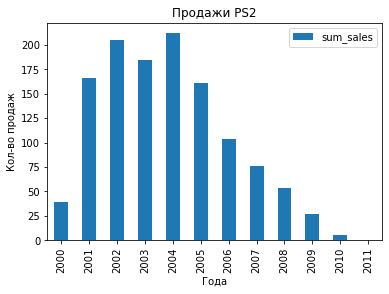

In [20]:
# 2.1 PS2
data.query('platform == "PS2"').pivot_table(index=['year_of_release'], values=['sum_sales'], aggfunc='sum').plot(kind='bar')
plt.title('Продажи PS2')
plt.xlabel('Года')
plt.ylabel('Кол-во продаж')

Высокие продажи PS2 были с 2001 по 2005, после они стали падать и после 2011 платформа полностью потеряла актуальность.

Text(0, 0.5, 'Кол-во продаж')

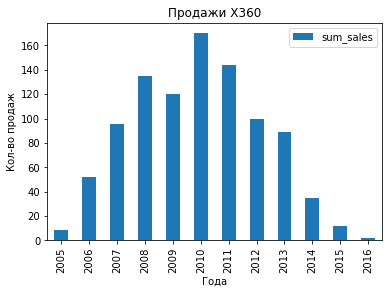

In [21]:
# 2.2 X360
data.query('platform == "X360"').pivot_table(index=['year_of_release'], values=['sum_sales'], aggfunc='sum').plot(kind='bar')
plt.title('Продажи X360')
plt.xlabel('Года')
plt.ylabel('Кол-во продаж')

Платформа X360 была популярной и имела высокие продажи с 2006 по 2011, далее продажи стали падать, на 2016 кол-во проданных платформ очень мало.

Text(0, 0.5, 'Кол-во продаж')

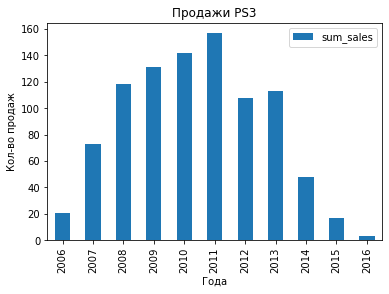

In [22]:
# 2.3. PS3
data.query('platform == "PS3"').pivot_table(index=['year_of_release'], values=['sum_sales'], aggfunc='sum').plot(kind='bar')
plt.title('Продажи PS3')
plt.xlabel('Года')
plt.ylabel('Кол-во продаж')

Платформа PS3 имела высокие продажи с 2007 по 2011, после продажи стали падать и на данный момент их очень мало.

Text(0, 0.5, 'Кол-во продаж')

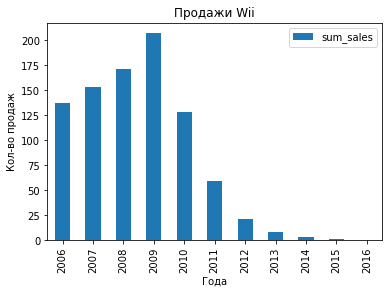

In [23]:
# 2.4 Wii
data.query('platform == "Wii"').pivot_table(index=['year_of_release'], values=['sum_sales'], aggfunc='sum').plot(kind='bar')
plt.title('Продажи Wii')
plt.xlabel('Года')
plt.ylabel('Кол-во продаж')

Платформа Wii имела высокие продажи с 2006 по 2010, после актуальность стала резко падать и к 2016 кол-во продаж незначительно.

Text(0, 0.5, 'Кол-во продаж')

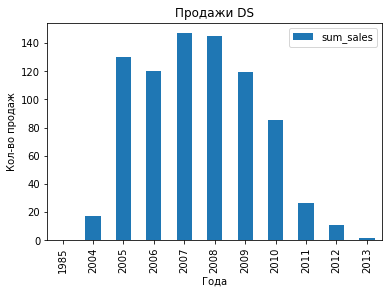

In [24]:
# 2.5 DS
data.query('platform == "DS"').pivot_table(index=['year_of_release'], values=['sum_sales'], aggfunc='sum').plot(kind='bar')
plt.title('Продажи DS')
plt.xlabel('Года')
plt.ylabel('Кол-во продаж')


Наличие продаж в 1985 просто аномалия(данная платформа не существовала в это время), игнорируем её. <br>Платформа DS имела высоки продажи с 2005 по 2010, после популярность начала резко падать и с 2014 года платформа не имеет продаж.

Text(0, 0.5, 'Кол-во продаж')

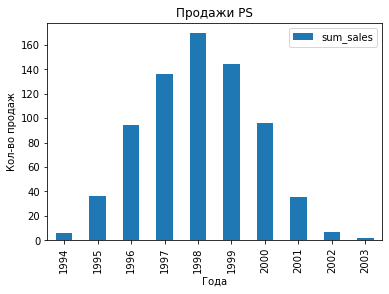

In [25]:
#2.6 PS
data.query('platform == "PS"').pivot_table(index=['year_of_release'], values=['sum_sales'], aggfunc='sum').plot(kind='bar')
plt.title('Продажи PS')
plt.xlabel('Года')
plt.ylabel('Кол-во продаж')

Платформа PS имеет резкий рост продаж с 1995 по 1998, с 1999 продажи начали падать и к 2004 году платформа полностью потеряла актуальность.

Вывод: <br> В среднем платформа остаётся достаточно актуальной и сохраняет высокие продажи в течении 6 лет.
<br>
<br> Далее возьмём данные за актуальный перид (3 года), на основе которых можно будет делать прогноз на 2017 год.

In [26]:
# 3. Будем работать с данными после 2014г включительно и поместим их в переменную act_per:
act_per = data.query('year_of_release >= 2014').copy()

Text(0, 0.5, 'Кол-во продаж')

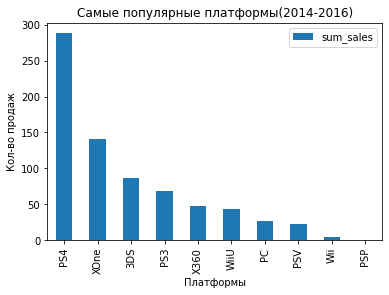

In [27]:
# Какие платформы лидируют по продажам в актуальном периоде:
act_per.pivot_table(index=['platform'], values=['sum_sales'], aggfunc='sum').sort_values('sum_sales', ascending=False).plot(kind='bar')
plt.title('Самые популярные платформы(2014-2016)')
plt.xlabel('Платформы')
plt.ylabel('Кол-во продаж')

По графику видно, что за актуальные период лидируют платформы PS4, XOne и 3DS. 
<br> Далее проанализируем, как менялись продажи по годам каждой из вышеперечисленных платформ в актуальном периоде:

Text(0, 0.5, 'Кол-во продаж')

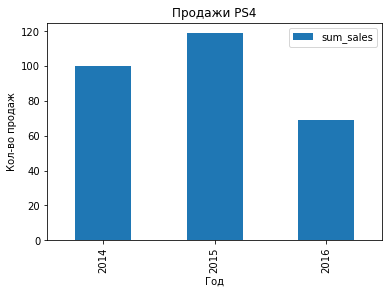

In [28]:
# 3.1 PS4
act_per.query('platform == "PS4"').pivot_table(index=['year_of_release'], values=['sum_sales'], aggfunc='sum').plot(kind='bar')
plt.title('Продажи PS4')
plt.xlabel('Год')
plt.ylabel('Кол-во продаж')

Посколько датасет за декабрь 2016, мы можем заключить, что данные не полные и на данный момент продажи платформы PS4 также актуально и находится приблизительно на таком же уровне как и в 2015.

Text(0, 0.5, 'Кол-во продаж')

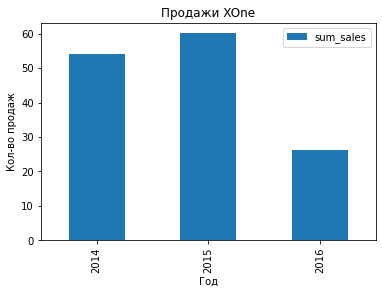

In [29]:
# 3.2 XOne
act_per.query('platform == "XOne"').pivot_table(index=['year_of_release'], values=['sum_sales'], aggfunc='sum').plot(kind='bar')
plt.title('Продажи XOne')
plt.xlabel('Год')
plt.ylabel('Кол-во продаж')

Продажи в 2014 и 2015 годах были достаточно высокими, из-за неполноты данных на 2016 год мы можем предположить, что продаж чуть меньше, чем в 2015. Но пик продаж почти в 2 раза меньше, чем у PS4.

Text(0, 0.5, 'Кол-во продаж')

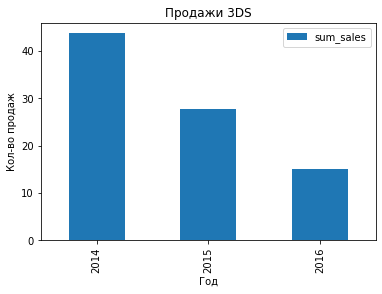

In [30]:
# 3.3 3DS
act_per.query('platform == "3DS"').pivot_table(index=['year_of_release'], values=['sum_sales'], aggfunc='sum').plot(kind='bar')
plt.title('Продажи 3DS')
plt.xlabel('Год')
plt.ylabel('Кол-во продаж')

Мы видим, что продажи платформы 3DS просели в 2015 и к 2016, елси учитывать нополноту данных, они будут на уровне 2015,либо чуть ниже. Но пик продаж почти в 3 раза меньше, чем у PS4 и 1.5 меньше чем пик продаж у платформы XOne.
<br>
<br> Мы разобрали топ-3 самый популярных платформ, сейчас посмотрим на оставшиеся: PS3, X360, WiiU, PC, PSV, Wii и PSP

Text(0, 0.5, 'Кол-во продаж')

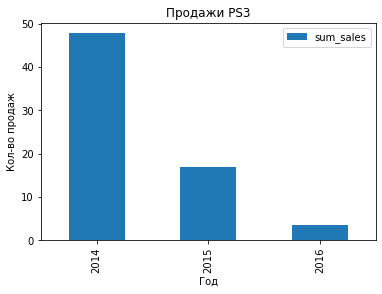

In [31]:
# 3.4 PS3
act_per.query('platform == "PS3"').pivot_table(index=['year_of_release'], values=['sum_sales'], aggfunc='sum').plot(kind='bar')
plt.title('Продажи PS3')
plt.xlabel('Год')
plt.ylabel('Кол-во продаж')

Продажи платформы PS3 стабильно падают, что вызванно, скорее всего, большей акуальностью более новой версии PS4.

Text(0, 0.5, 'Кол-во продаж')

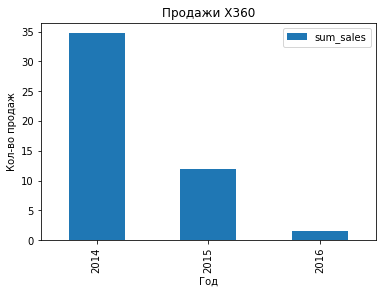

In [32]:
# 3.5 X360
act_per.query('platform == "X360"').pivot_table(index=['year_of_release'], values=['sum_sales'], aggfunc='sum').plot(kind='bar')
plt.title('Продажи X360')
plt.xlabel('Год')
plt.ylabel('Кол-во продаж')

Продажи платформы X360 так же стабильно падают в актуальном периоде.

Text(0, 0.5, 'Кол-во продаж')

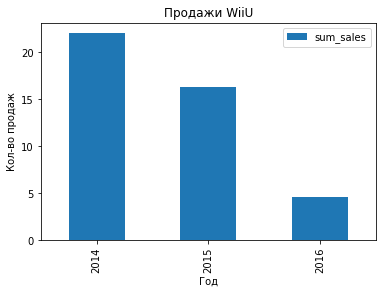

In [33]:
# 3.6 WiiU
act_per.query('platform == "WiiU"').pivot_table(index=['year_of_release'], values=['sum_sales'], aggfunc='sum').plot(kind='bar')
plt.title('Продажи WiiU')
plt.xlabel('Год')
plt.ylabel('Кол-во продаж')

Продажи WiiU не были высокими в актуальном периоде, но и не особо низкими. В актуальном периоде наблюдается спад продаж в среднем на 25% за год.

Text(0, 0.5, 'Кол-во продаж')

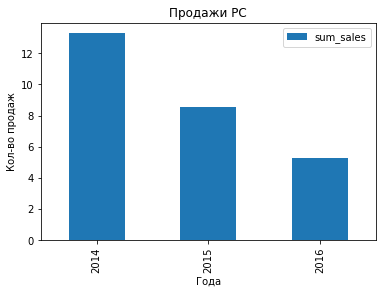

In [34]:
# 3.7 PC     
act_per.query('platform == "PC"').pivot_table(index=['year_of_release'], values=['sum_sales'], aggfunc='sum').plot(kind='bar')
plt.title('Продажи PC')
plt.xlabel('Года')
plt.ylabel('Кол-во продаж')

Продажи PC падают в среднем на 30% с каждым новым годом в актуальном периоде.

Text(0, 0.5, 'Кол-во продаж')

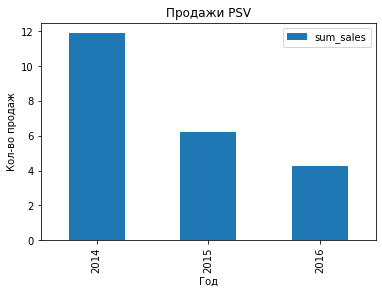

In [35]:
# 3.8 PSV
act_per.query('platform == "PSV"').pivot_table(index=['year_of_release'], values=['sum_sales'], aggfunc='sum').plot(kind='bar')
plt.title('Продажи PSV')
plt.xlabel('Год')
plt.ylabel('Кол-во продаж')

Продажи PSV в 10 раз меньше, чем PS4, и имеют тенденция на снижения с каждым новым годом.

Text(0, 0.5, 'Кол-во продаж')

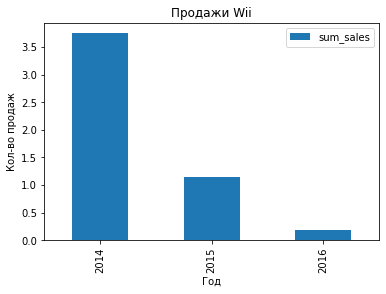

In [36]:
# 3.9 Wii
act_per.query('platform == "Wii"').pivot_table(index=['year_of_release'], values=['sum_sales'], aggfunc='sum').plot(kind='bar')
plt.title('Продажи Wii')
plt.xlabel('Год')
plt.ylabel('Кол-во продаж')

Продажи Wii с 2014 по 2015 упали в 3 раза, в 2016 кол-во продаж очень мало.

Text(0, 0.5, 'Кол-во продаж')

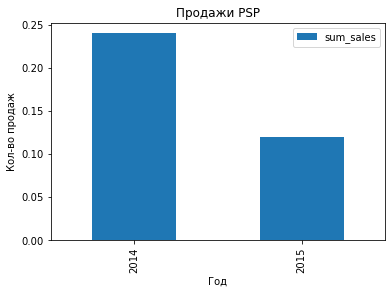

In [37]:
# 3.10 PSP
act_per.query('platform == "PSP"').pivot_table(index=['year_of_release'], values=['sum_sales'], aggfunc='sum').plot(kind='bar')
plt.title('Продажи PSP')
plt.xlabel('Год')
plt.ylabel('Кол-во продаж')

Продажи PSP поддерживались ещё на небольшом уровне в 2014 и 2015, в 2016 продаж вообще нету.

Актуальными остаются продажи платформ PS4, XOne и 3DS. Из-за неполноты данных к 2016 их продажи остаются в среднем на таком же уровне, как и в 2015г, либо чуть меньше.
<br> Продажи платформ PS3, X360, WiiU, PC, PSV, Wii и PSP в актуальном периоде падают ежегодно и не имеют большой перспективы на рост.
<br> 
<br> Потенциально прибыльнимы являются следующие платформы: PS4, XOne и 3DS.

Text(0.5, 0, 'Платформы')

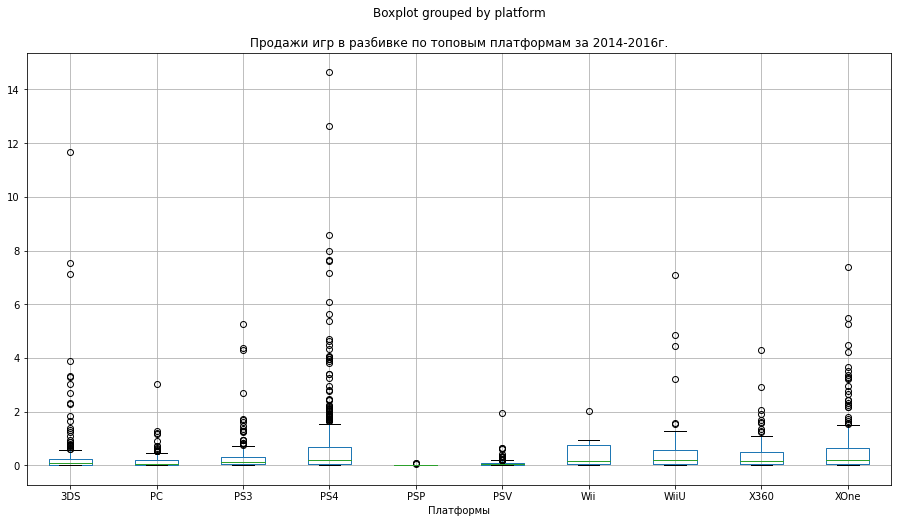

In [38]:
# 4.1 "График с усами" по глобальным продажам игр в разбивке по топовым платформам для оценки выбросов
act_per.boxplot(by='platform', column = ['sum_sales'], figsize=(15, 8))
plt.title('Продажи игр в разбивке по топовым платформам за 2014-2016г.')
plt.xlabel('Платформы')

Text(0.5, 0, 'Платформы')

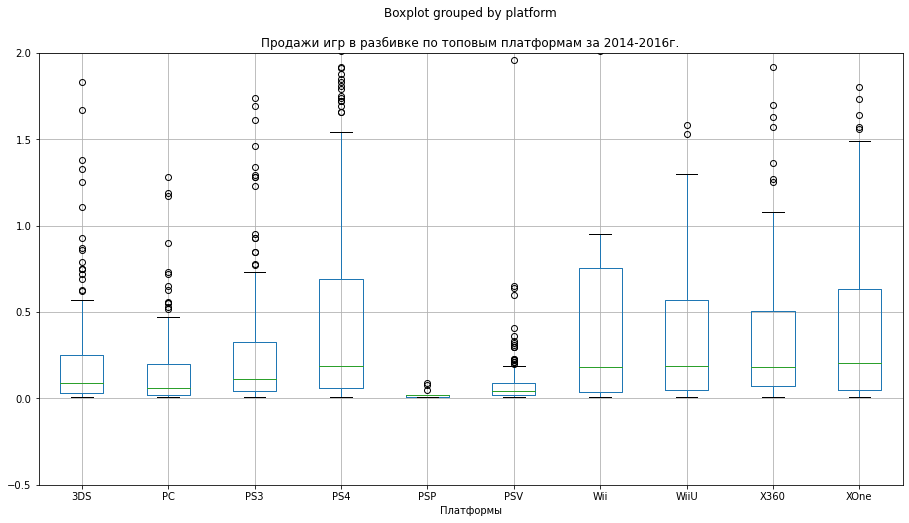

In [39]:
# 4.2  Масштабированный "график с усами" по глобальным продажам игр в разбивке по топовым платформам
act_per.boxplot(by='platform', column = ['sum_sales'], figsize=(15, 8))
plt.ylim(-0.5, 2)
plt.title('Продажи игр в разбивке по топовым платформам за 2014-2016г.')
plt.xlabel('Платформы')

In [40]:
act_per.pivot_table(index=['platform'], values=['sum_sales'], aggfunc=['var', 'median', 'mean'])

,var,median,mean
,sum_sales,sum_sales,sum_sales
platform,,,
3DS,1.412219,0.090,0.408868
PC,0.108477,0.060,0.179139
PS3,0.400764,0.110,0.311324
PS4,2.608124,0.185,0.766356
PSP,0.000769,0.020,0.027692
PSV,0.020048,0.040,0.075932
Wii,0.391189,0.180,0.460909
WiiU,1.349005,0.190,0.588767


По графикам видно, что почти у всех платформ есть большие выбросы по продажам, поэтому опираться на среднее значение не имеет большого смысла, но медианные значения у половины платформ очень близки: PS4-0.185, Wii-0.180, WiiU-0.190, X360-0.180, XOne-0.205. Есть платформы с высоким медианным значением, которые помимо этого ещё имеют и относительно высокое среднее значение, это - PS4(0.766356), WiiU(0.588767), XOne(0.615614). Это ещё раз подтверждает популярность платформ, которых мы упомянули выше: PS4 и Xone. 
<br>
<br> Далее отобразим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Анализ проведём на примерах 10 платформ, которые являются самой популярной на данный момент. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. (critic_score, user_score)

critic_score    0.202863
sum_sales       1.000000
Name: sum_sales, dtype: float64
user_score    0.112794
sum_sales     1.000000
Name: sum_sales, dtype: float64


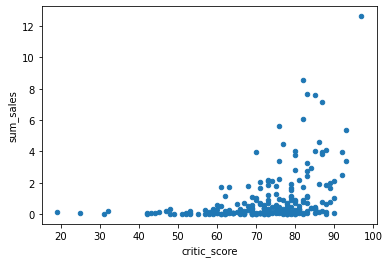

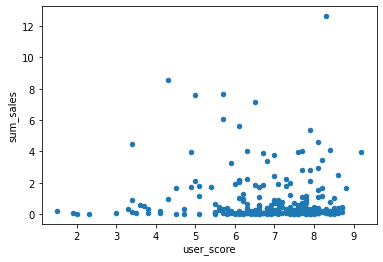

In [41]:
# 5.1 Диаграмма рассеивания для PS4, зависимость продаж от оценки критиков и пользователей.
act_per_ps4 = act_per.query('platform == "PS4"')
act_per_ps4[act_per_ps4['critic_score'] != -10].plot(kind='scatter', x='critic_score', y='sum_sales')
act_per_ps4[act_per_ps4['user_score'] != -10].plot(kind='scatter', x='user_score', y='sum_sales')

# Рассчёт кореляции
print(act_per_ps4[act_per_ps4['critic_score'] != 10][['critic_score', 'sum_sales']].corr()['sum_sales'])
print(act_per_ps4[act_per_ps4['user_score'] != 10][['user_score', 'sum_sales']].corr()['sum_sales'])


Оценки критиков имеют влияние, но относительно небольшое(0.20), оценки же пользователей не влияют на продажи вовсе(0.1).

critic_score    0.263018
sum_sales       1.000000
Name: sum_sales, dtype: float64
user_score    0.122289
sum_sales     1.000000
Name: sum_sales, dtype: float64


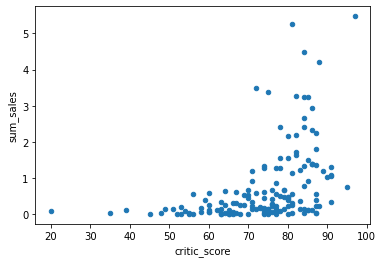

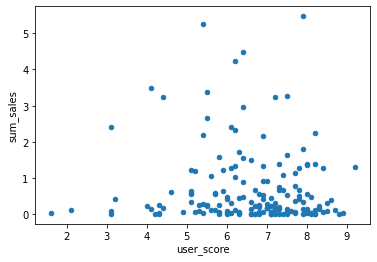

In [42]:
# 5.2 Диаграмма рассеивания для XOne, зависимость продаж от оценки критиков и пользователей.
act_per_XOne = act_per.query('platform == "XOne"')
act_per_XOne[act_per_XOne['critic_score'] != -10].plot(kind='scatter', x='critic_score', y='sum_sales')
act_per_XOne[act_per_XOne['user_score'] != -10].plot(kind='scatter', x='user_score', y='sum_sales')

# Рассчёт кореляции
print(act_per_XOne[act_per_XOne['critic_score'] != 10][['critic_score', 'sum_sales']].corr()['sum_sales'])
print(act_per_XOne[act_per_XOne['user_score'] != 10][['user_score', 'sum_sales']].corr()['sum_sales'])

Зависимость продаж платформы XOne от оценки критиков чуть выше(0.26), чем у PS4, но на таком же уровне, как и от оценки пользователей(0.12)

critic_score    0.050897
sum_sales       1.000000
Name: sum_sales, dtype: float64
user_score    0.046617
sum_sales     1.000000
Name: sum_sales, dtype: float64


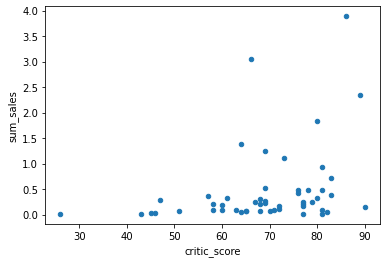

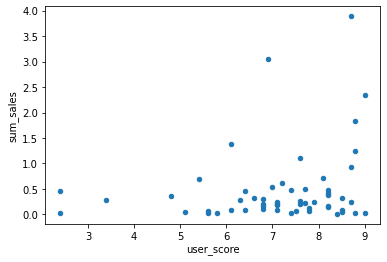

In [43]:
# 5.3 Диаграмма рассеивания для 3DS, зависимость продаж от оценки критиков и пользователей.
act_per_3DS = act_per.query('platform == "3DS"')
act_per_3DS[act_per_3DS['critic_score'] != -10].plot(kind='scatter', x='critic_score', y='sum_sales')
act_per_3DS[act_per_3DS['user_score'] != -10].plot(kind='scatter', x='user_score', y='sum_sales')

# Рассчёт кореляции
print(act_per_3DS[act_per_3DS['critic_score'] != 10][['critic_score', 'sum_sales']].corr()['sum_sales'])
print(act_per_3DS[act_per_3DS['user_score'] != 10][['user_score', 'sum_sales']].corr()['sum_sales'])

Продажи платформы 3DS имеют очень низкую кореляции как с оценками критиков(0.05), так и с оценками пользователей(0.04).

critic_score    0.021283
sum_sales       1.000000
Name: sum_sales, dtype: float64
user_score    0.242079
sum_sales     1.000000
Name: sum_sales, dtype: float64


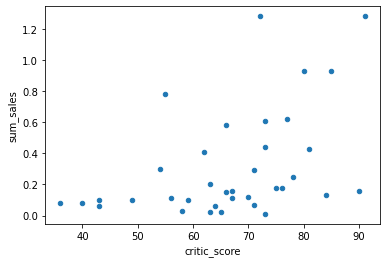

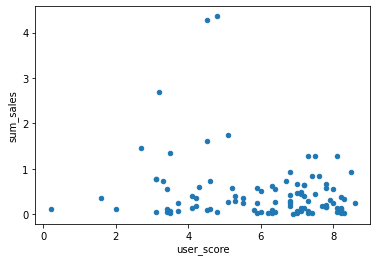

In [44]:
# 5.4 Диаграмма рассеивания для PS3, зависимость продаж от оценки критиков и пользователей.
act_per_PS3 = act_per.query('platform == "PS3"')
act_per_PS3[act_per_PS3['critic_score'] != -10].plot(kind='scatter', x='critic_score', y='sum_sales')
act_per_PS3[act_per_PS3['user_score'] != -10].plot(kind='scatter', x='user_score', y='sum_sales')

# Рассчёт кореляции
print(act_per_PS3[act_per_PS3['critic_score'] != 10][['critic_score', 'sum_sales']].corr()['sum_sales'])
print(act_per_PS3[act_per_PS3['user_score'] != 10][['user_score', 'sum_sales']].corr()['sum_sales'])

Продажи платформы PS3 имеют очень низкую кореляции как с оценками критиков(0.02), так и с оценками пользователей(0.24)

critic_score   -0.001281
sum_sales       1.000000
Name: sum_sales, dtype: float64
user_score    0.127809
sum_sales     1.000000
Name: sum_sales, dtype: float64


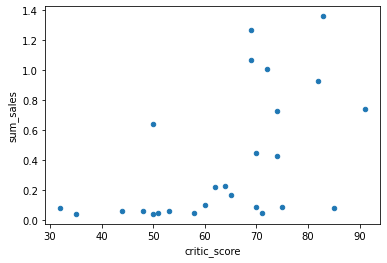

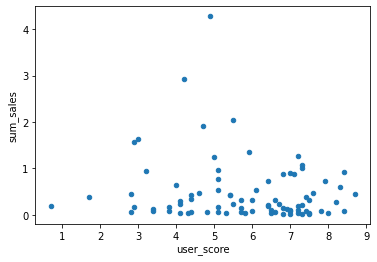

In [45]:
# 5.5 Диаграмма рассеивания для X360, зависимость продаж от оценки критиков и пользователей.
act_per_X360 = act_per.query('platform == "X360"')
act_per_X360[act_per_X360['critic_score'] != -10].plot(kind='scatter', x='critic_score', y='sum_sales')
act_per_X360[act_per_X360['user_score'] != -10].plot(kind='scatter', x='user_score', y='sum_sales')

# Рассчёт кореляции
print(act_per_X360[act_per_X360['critic_score'] != 10][['critic_score', 'sum_sales']].corr()['sum_sales'])
print(act_per_X360[act_per_X360['user_score'] != 10][['user_score', 'sum_sales']].corr()['sum_sales'])

Продажи X360 также имеют низкую зависимость с оценкой критиков(0.0) и оценкой пользователей(0.12).

critic_score    0.283759
sum_sales       1.000000
Name: sum_sales, dtype: float64
user_score    0.207449
sum_sales     1.000000
Name: sum_sales, dtype: float64


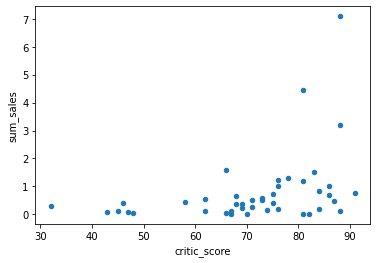

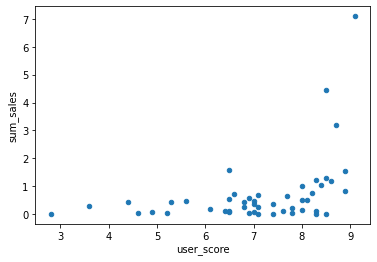

In [46]:
# 5.6 Диаграмма рассеивания для WiiU, зависимость продаж от оценки критиков и пользователей.
act_per_WiiU = act_per.query('platform == "WiiU"')
act_per_WiiU[act_per_WiiU['critic_score'] != -10].plot(kind='scatter', x='critic_score', y='sum_sales')
act_per_WiiU[act_per_WiiU['user_score'] != -10].plot(kind='scatter', x='user_score', y='sum_sales')

# Рассчёт кореляции
print(act_per_WiiU[act_per_WiiU['critic_score'] != 10][['critic_score', 'sum_sales']].corr()['sum_sales'])
print(act_per_WiiU[act_per_WiiU['user_score'] != 10][['user_score', 'sum_sales']].corr()['sum_sales'])

Продажи WiiU слегка выделяются на фоне остальных платформ, посколько имееют помимо небольшой зависимости продажи от оценки критиков(0.28) ещё и такую же зависимость от оценки пользователей(0.21).

critic_score    0.180743
sum_sales       1.000000
Name: sum_sales, dtype: float64
user_score    0.095259
sum_sales     1.000000
Name: sum_sales, dtype: float64


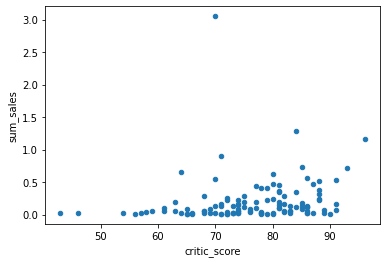

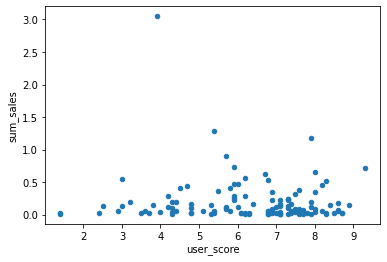

In [47]:
# 5.7 Диаграмма рассеивания для PC, зависимость продаж от оценки критиков и пользователей.
act_per_PC = act_per.query('platform == "PC"')
act_per_PC[act_per_PC['critic_score'] != -10].plot(kind='scatter', x='critic_score', y='sum_sales')
act_per_PC[act_per_PC['user_score'] != -10].plot(kind='scatter', x='user_score', y='sum_sales')

# Рассчёт кореляции
print(act_per_PC[act_per_PC['critic_score'] != 10][['critic_score', 'sum_sales']].corr()['sum_sales'])
print(act_per_PC[act_per_PC['user_score'] != 10][['user_score', 'sum_sales']].corr()['sum_sales'])

Продажи PC не имеют зависимости от оценки критиков(0.18) и пользователей(0.09).

critic_score    0.202863
sum_sales       1.000000
Name: sum_sales, dtype: float64
user_score    0.112794
sum_sales     1.000000
Name: sum_sales, dtype: float64


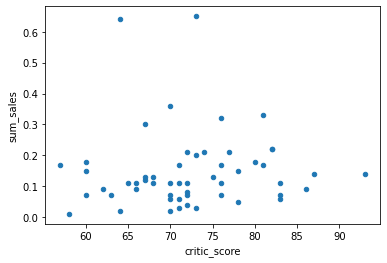

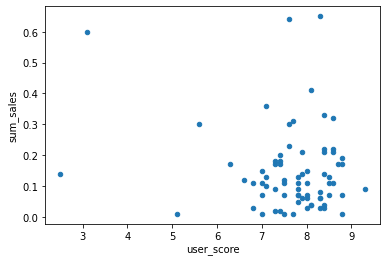

In [48]:
# 5.8 Диаграмма рассеивания для PSV, зависимость продаж от оценки критиков и пользователей.
act_per_PSV = act_per.query('platform == "PSV"')
act_per_PSV[act_per_PSV['critic_score'] != -10].plot(kind='scatter', x='critic_score', y='sum_sales')
act_per_PSV[act_per_PSV['user_score'] != -10].plot(kind='scatter', x='user_score', y='sum_sales')

# Рассчёт кореляции
print(act_per_ps4[act_per_ps4['critic_score'] != 10][['critic_score', 'sum_sales']].corr()['sum_sales'])
print(act_per_ps4[act_per_ps4['user_score'] != 10][['user_score', 'sum_sales']].corr()['sum_sales'])

Продажи PSV не имеют зависимости от оценки критиков(0.20) и пользователей(0.11).

Вывод: <br> Из диаграмм рассеивания и значений кореляции видно, что на все платформы оценки критиков влияют очень слабо, оценки пользователей влияют слабо либо же совсем не влияют. 
<br>
<br> Далее посмотрим на на общее распределение игр по жанрам. 

Text(0, 0.5, 'Суммарные продажи')

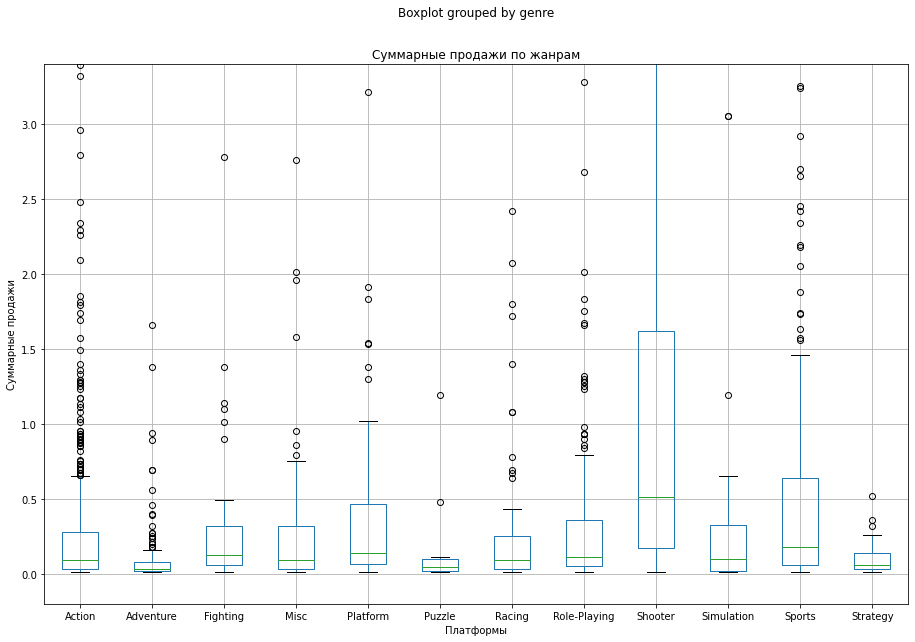

In [49]:
# Распределение игр по жанрам(Genre)
act_per.boxplot(by=['genre'], column=['sum_sales'], figsize=(15, 10))
plt.ylim(-0.2, 3.4)
plt.title('Суммарные продажи по жанрам')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи')

In [50]:
# Сравним жанры по медианному значению
act_per.groupby('genre').median()['sum_sales'].sort_values(ascending=False)

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: sum_sales, dtype: float64

Из графика и по таблице видно, что самым популярным жанром по медианному значению является Shooter, далее идут жанры Sports, Platform и Fighting. Остальные жанры им уступают.

#### Выводы по исследовательскому анализу данных:
 В актуальном периоде(2014г-2016г) самыми продаваемыми были платформы PS4, XOne и 3DS. Их продажи росли либо оставались на таком же уровне в течении последних трёх лет(с учетом неполноты данных за 2016г). С помощью ящика с усами мы увидели, что почти все платформы имеют вобросы, расположенные за 'усами'. Поэтому основным показателем для нас была медиана, ибо она устойчива к выбросам. 
<br> + мы увидели, что зависимость продаж и оценки критиков и пользователей очень мала.
<br> Самым популярным жанром по медианному значению является Shooter, далее идут жанры Sports, Platform и Fighting.

### 4 шаг: Составление портрет пользователя каждого региона.
<br> 1) Определим самые популярные платформы для пользователей каждого региона.
<br> 2) Определим самые популярные жанры для пользователей каждого региона.
<br> 3) Определим влияние рейтинга ESRB на продажи в отдельных регионах.


Определим долю пользователей каждого региона (NA, EU, JP) для популярных платформ актуального периода(2014г-2016г).
<br> NA_sales, EU_sales, JP_sales

Text(0, 0.5, 'Продажи, млн шт')

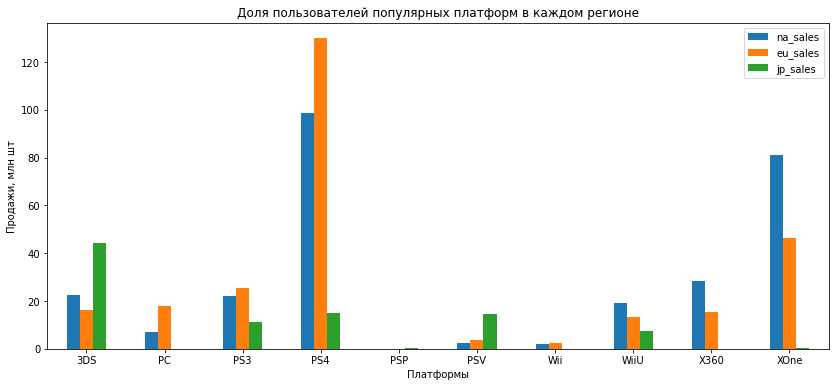

In [51]:
# Доля пользователей NA
na_platf = act_per.groupby(['platform'])['na_sales'].agg('sum')
# Доля пользователей EU
eu_platf = act_per.groupby(['platform'])['eu_sales'].agg('sum')
# Доля пользователей JP
jp_platf = act_per.groupby(['platform'])['jp_sales'].agg('sum')

# Объединим
all_us_platf = pd.concat([na_platf, eu_platf, jp_platf], axis=1).reset_index()

# График
all_us_platf.plot(kind='bar', x='platform' , figsize=(14, 6), rot=0)
plt.title('Доля пользователей популярных платформ в каждом регионе')
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн шт')



Для пользователей Америки самыми популярными являются платформы PS4 и XOne. Самыми непопулярными являются платформы Wii и PSV.
<br>
<br>Для пользователей Европы самыми популярными являются платформы PS4 и XOne Самыми непопулярными являются платформы Wii и PSV
<br>
<br>Для пользователей Японии самой популярной является платформа 3DS. Самыми непопулярными являются платформы X360, XOne, wii и PC.
<br>
<br>
<br> Определим самые популярные жанры среди пользователей каждого региона (NA, EU, JP).
<br> NA_sales, EU_sales, JP_sales

Text(0, 0.5, 'Продажи, млн шт')

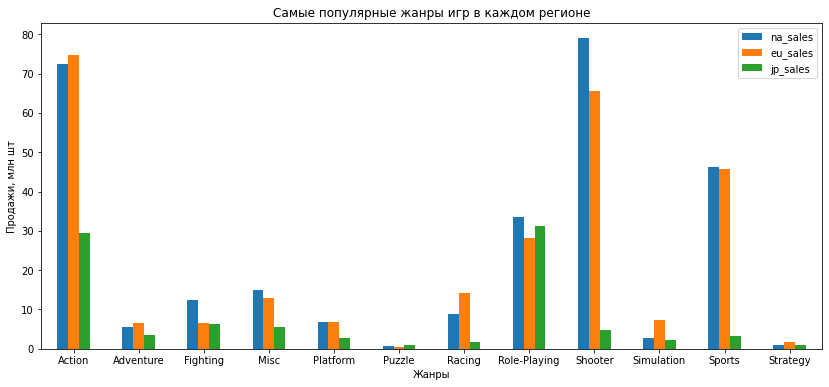

In [52]:
# Жанры для пользователей NA
na_genre = act_per.groupby(['genre'])['na_sales'].agg('sum')
# Жанры для пользователей EU
eu_genre = act_per.groupby(['genre'])['eu_sales'].agg('sum')
# Жанры для пользователей JP
jp_genre = act_per.groupby(['genre'])['jp_sales'].agg('sum')

# Объединим
all_genre = pd.concat([na_genre, eu_genre, jp_genre], axis=1).reset_index()

# График
all_genre.plot(kind='bar', x='genre' , figsize=(14, 6), rot=0)
plt.title('Самые популярные жанры игр в каждом регионе')
plt.xlabel('Жанры')
plt.ylabel('Продажи, млн шт')

Для пользователей Америки самыми популярными являются жанры Shooter, Action и Sports. Самыми непопулярными являются жанры Puzzle, Strategy и Simulation.
<br>
<br>Для пользователей Европы самыми популярными являются жанры Action, Shooter и Sports. Самыми непопулярными являются жанры Puzzle и Strategy.
<br>
<br>Для пользователей Японии самой популярной является жанры Action и Role-Playing. Самыми непопулярными являются жанры Puzzle, Strategy и Racing.
<br>
<br>
<br> В общем и целом мы видим, что вкусы пользователей из Америки и Европы во многом схожи, предпочтения же пользователей из Японии заметно отличаются. 

Далее определим влияние рейтинга ESRB на продажи в отдельных регионах(NA, EU, JP).
<br> NA_sales, EU_sales, JP_sales

Text(0, 0.5, 'Продажи, млн шт')

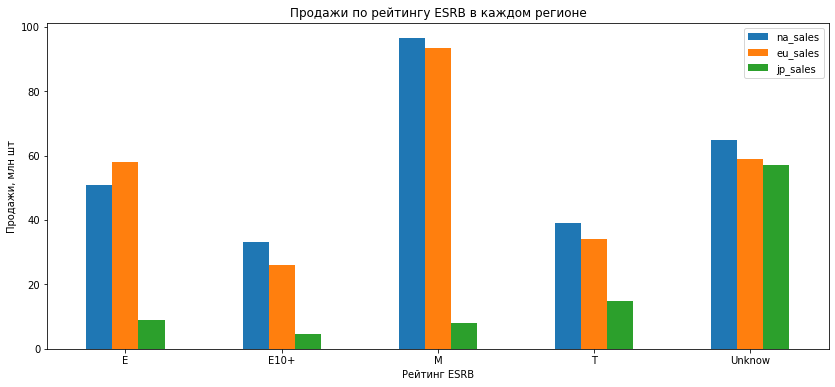

In [53]:
# Продажи по рейтингу ESRB для пользователей NA по 
na_rating = act_per.groupby(['rating'])['na_sales'].agg('sum')
# Продажи по рейтингу ESRB для пользователей EU
eu_rating = act_per.groupby(['rating'])['eu_sales'].agg('sum')
# Продажи по рейтингу ESRB для пользователей JP
jp_rating = act_per.groupby(['rating'])['jp_sales'].agg('sum')

# Объединим
all_rating = pd.concat([na_rating, eu_rating, jp_rating], axis=1).reset_index()

# График
all_rating.plot(kind='bar', x='rating' , figsize=(14, 6), rot=0)
plt.title('Продажи по рейтингу ESRB в каждом регионе')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи, млн шт')

Для пользователей из Америки самыми популярными являются игры с рейтингом M, Uknow и E.
<br>
<br> Для пользователей из Европы самыми популярными являются игры с рейтингом M, Uknow и E.
<br>
<br>Для пользователей из Японии самыми популярными являются игры с рейтингом Uknow и T.
<br>
<br> В целом мы видим, что и в этом плане пользователи из Америки и Европы имеют одинаковые предпочтения.

#### Вывод по определению портрета пользователей каждого региона:
<br> Мы провели исследование для определения портрета пользователей каждого региона. Мы видим, что у пользователей из Америки и Европы предпочтения практически идентичны: самые популярные платформы у них это PS4 и XOne; самые популрные жанры это Action, Shooter и Sports; самыми популярными являются игры с рейтингом M, Uknow и E.
<br> Для пользователей из Японии картина немного другая: самая популярная платформа-3DS; самыми популярными являются жанры Action и Role-Playing; самыми популярными являются игры с рейтингом Uknow и T.

### Шаг 5. Проверка гипотез:


Определим, какая гипотеза нулевая, а какая альтернативная, после же используем t-test.<br> Нулевая гипотеза по определению должна быть со знаком равенства, а в альтернативную мы уже закладываем смысл, который нам нужен

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените метод scipy.stats.ttest_ind()

В данных ситуациях нужно определить статистическую значимость различий средних величин, поэтому мы будем использовать t-критерий Стьюдента. 

<br> 1.1. Нулевая гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br>(Средний пользовательский рейтинг платформы Xbox One == средний пользовательский рейтинг платформы PC)
<br> 1.2. Альтернативная гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC отличаются.<br>(Средний пользовательский рейтинг платформы Xbox One != средний пользовательский рейтинг платформы PC).

In [54]:
# Создадим переменную без заглушек
act_per_cl = act_per[act_per['user_score'] != -10]

results = st.ttest_ind(act_per_cl.query('platform == "XOne"')['user_score'], act_per_cl.query('platform == "PC"')['user_score'])

alpha = 0.05# критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Вывод: p-значение: 0.10450507919348415
<br>Нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются. Принимаем нулевую гипотезу, p-значение больше значения alpha, что дает основание принять предположение об отсутствии различий между средними пользовательскими рейтингами платформ Xbox One и PC
<br>
<br> Проверим следующую гипотезу:



<br> 2.1. Нулевая гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
<br> (Средний пользовательский рейтинг жанра Action == средний пользовательский рейтинг жанра Sports)
<br> 2.2. Альтернативная гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
<br>(Средний пользовательский рейтинг жанра Action != средний пользовательский рейтинг жанра Sports)

In [55]:
results = st.ttest_ind(act_per_cl.query('genre == "Action"')['user_score'], act_per_cl.query('genre == "Sports"')['user_score'])

alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Вывод: p-значение: 2.8711147985105864e-19
<br> Принимаем альтернативную гипотезу, p-значение достаточно мало, что дает основание отвергнуть предположение об отсутствии различий между cредними пользовательскими рейтингами жанров Action и Sports.

### 6 шаг. Общий вывод:
<br> 1. Проведен обзор данных и сделана предобработка данных: мы удалили пропуски в тех местах, где их было меньше 5% от всего столбца, в остальных случаях пропуски заполнили медианным значением по суммарным продажам, платформе и жанру игры и изменили тип данных в year_of_release с float на int и в user_score на float. Создали столбец "sum_sales", который включает суммарные продажи по всем регионам. В целом, данные предобработаны и готовы к дальнейшему изучению.
<br>
<br> 2. Был проведен исследовательский анализ данных: в актуальном периоде(2014г-2016г) самыми продаваемыми были платформы PS4, XOne и 3DS. Их продажи росли либо оставались на таком же уровне в течении последних трёх лет(с учетом неполноты данных за 2016г). С помощью ящика с усами мы увидели, что почти все платформы имеют вобросы, расположенные за 'усами'. Поэтому основным показателем для нас была медиана, ибо она устойчива к выбросам. 
<br> + мы увидели, что зависимость продаж и оценки критиков и пользователей очень мала.
<br> Самым популярным жанром по медианному значению является Shooter, далее идут жанры Sports, Platform и Fighting.
<br>
<br> 3. Был составлен портрет пользователя каждого региона: было обнаружено, что у пользователей из Америки и Европы предпочтения практически идентичны: самые популярные платформы у них это PS4 и XOne; самые популрные жанры это Action, Shooter и Sports; самыми популярными являются игры с рейтингом M, Uknow и E.
<br> Для пользователей из Японии картина немного другая: самая популярная платформа-3DS; самыми популярными являются жанры Action и Role-Playing; самыми популярными являются игры с рейтингом Uknow и T.
<br>
<br> 4. Проверили следующие гипотезы: <br>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
<br>Средние пользовательские рейтинги жанров Action и Sports разные
<br> По итогу проверки в первом случае мы приняли нулевую гипотезу(отсутствии различий между средними пользовательскими рейтингами платформ Xbox One и PC), во втором-альтернативную(отвергаем предположение об отсутствии различий между cредними пользовательскими рейтингами жанров Action и Sports)
<br> 
<br> Вывод для рекламщиков: самым выгодным действием будет реклама жанры игр Shooter и Sports c рейтингом M и E для платформ PS4 и XOne  в Америке и Европе.